Exercise 1. JIT the Mandelbrot fractal
--------------------------------------------

Separate exercise notebook or use your own Mandelbrot code 

1. Profile the code, find the bottlenecks
2. Use Numba to speed up the code
3. Compare the timing

In [1]:
!pip install line_profiler
%load_ext line_profiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
from numba import jit

import time
import line_profiler
import cProfile

In [3]:
from __future__ import print_function, division, absolute_import

from timeit import default_timer as timer
from matplotlib.pylab import imshow, jet, show, ion
import numpy as np

from numba import jit
import matplotlib.pyplot as plt
%matplotlib inline

###@jit
def mandel(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    i = 0
    c = complex(x,y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i

    return 255

###@jit
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

    return image

In [4]:
image = np.zeros((500 * 2, 750 * 2), dtype=np.uint8)
s = timer()
create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20)
e = timer()
print(e - s)

10.075292938000075


In [5]:
def main_create_frac():
    image = np.zeros((500 * 2, 750 * 2), dtype=np.uint8)
    create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20)

In [6]:
cProfile.run('main_create_frac()')

         1500006 function calls in 9.152 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  1500000    7.778    0.000    7.778    0.000 <ipython-input-3-e69eb59b42c9>:12(mandel)
        1    1.369    1.369    9.147    9.147 <ipython-input-3-e69eb59b42c9>:29(create_fractal)
        1    0.000    0.000    9.151    9.151 <ipython-input-5-386a4d811603>:1(main_create_frac)
        1    0.000    0.000    9.152    9.152 <string>:1(<module>)
        1    0.000    0.000    9.152    9.152 {built-in method builtins.exec}
        1    0.005    0.005    0.005    0.005 {built-in method numpy.zeros}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [7]:
%lprun -f mandel -f create_fractal main_create_frac()

In [8]:
%lprun -T timings_mandel.txt -f mandel -f create_fractal main_create_frac()


*** Profile printout saved to text file 'timings_mandel.txt'. 


In [9]:
with open('timings_mandel.txt') as file:
    lines=file.readlines()
lines

['Timer unit: 1e-09 s\n',
 '\n',
 'Total time: 13.6956 s\n',
 'File: <ipython-input-3-e69eb59b42c9>\n',
 'Function: mandel at line 12\n',
 '\n',
 'Line #      Hits         Time  Per Hit   % Time  Line Contents\n',
 '==============================================================\n',
 '    12                                           def mandel(x, y, max_iters):\n',
 '    13                                               """\n',
 '    14                                               Given the real and imaginary parts of a complex number,\n',
 '    15                                               determine if it is a candidate for membership in the Mandelbrot\n',
 '    16                                               set given a fixed number of iterations.\n',
 '    17                                               """\n',
 '    18   1500000  264116507.0    176.1      1.9      i = 0\n',
 '    19   1500000  495331954.0    330.2      3.6      c = complex(x,y)\n',
 '    20   1500000  266791809

In [10]:
jitted_mandel = jit()(mandel)

def jitted_create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = jitted_mandel(real, imag, iters)
            image[y, x] = color

    return image

jitted_create_fractal = jit()(jitted_create_fractal)

def jitted_main_create_frac():
    image = np.zeros((500 * 2, 750 * 2), dtype=np.uint8)
    jitted_create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20)

In [11]:
# Jitted version
cProfile.run('jitted_main_create_frac()')

         742705 function calls (710933 primitive calls) in 0.774 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     1064    0.001    0.000    0.002    0.000 <__array_function__ internals>:2(can_cast)
    29/27    0.000    0.000    0.026    0.001 <frozen importlib._bootstrap>:1002(_gcd_import)
3980/3748    0.005    0.000    0.192    0.000 <frozen importlib._bootstrap>:1017(_handle_fromlist)
      222    0.001    0.000    0.001    0.000 <frozen importlib._bootstrap>:103(release)
      163    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:143(__init__)
      163    0.000    0.000    0.002    0.000 <frozen importlib._bootstrap>:147(__enter__)
      163    0.000    0.000    0.001    0.000 <frozen importlib._bootstrap>:151(__exit__)
      222    0.001    0.000    0.002    0.000 <frozen importlib._bootstrap>:157(_get_module_lock)
      186    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:176(cb)


In [12]:
# Does not work
%lprun -f jitted_mandel -f jitted_create_fractal jitted_main_create_frac()

/usr/local/lib/python3.8/dist-packages/line_profiler/ipython_extension.py:71: UserWarning: Adding a function with a __wrapped__ attribute. You may want to profile the wrapped function by adding mandel.__wrapped__ instead.
  profile = LineProfiler(*funcs)
/usr/local/lib/python3.8/dist-packages/line_profiler/ipython_extension.py:71: UserWarning: Adding a function with a __wrapped__ attribute. You may want to profile the wrapped function by adding jitted_create_fractal.__wrapped__ instead.
  profile = LineProfiler(*funcs)


In [13]:
images = []
for size in [(500 * 1, 750 * 1), (500 * 2, 750 * 2), (500 * 3, 750 * 3), (500 * 4, 750 * 4), (500 * 5, 750 * 5)]:
    images.append(np.zeros(size, dtype=np.uint8))

In [14]:
from tqdm import tqdm

In [15]:
time_basic, time_numba = [], []
for im in tqdm(images):
    t_basic = time.time()
    create_fractal(-2.0, 1.0, -1.0, 1.0, im, 20)
    t_basic = time.time() - t_basic
    time_basic.append(t_basic)

    t_numba = time.time()
    jitted_create_fractal(-2.0, 1.0, -1.0, 1.0, im, 20)
    t_numba = time.time() - t_numba
    time_numba.append(t_numba)

100%|██████████| 5/5 [01:11<00:00, 14.30s/it]


In [16]:
plt.rcParams['figure.figsize'] = (11, 7)
plt.rcParams['font.size'] = 20

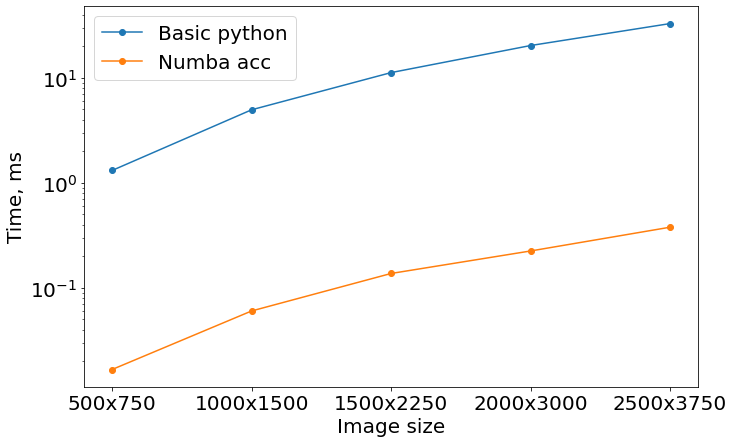

In [17]:
plt.plot(range(5), time_basic, '-o', label='Basic python')
plt.plot(range(5), time_numba, '-o', label='Numba acc')

plt.xticks(range(5), ['500x750', '1000x1500', '1500x2250', '2000x3000', '2500x3750'])
plt.xlabel('Image size')
plt.ylabel('Time, ms')
plt.legend()
plt.yscale('log');

## N-Body problems

Many physical problems require the evaluation of all pairwise interactions of a large number of particles, so-called N-body problems. These problems arise in molecular dynamics, astrodynamics and electromagnetics among others. 

Their pairwise interactions can be expressed as:

\begin{equation}
f_i = \sum_{j=1}^n{P \left(\boldsymbol{x}_i, \boldsymbol{x}_j \right)w_j} \ \ \ \text{for } i=1,2,...,n 
\end{equation}

*  where subscripts $i$,  $j$ respectively denote *target* and *source*
*  $f_i$ can be a *potential* (or *force*) at target point $i$
*  $w_j$ is the *source weight* 
*  $\boldsymbol{x}_i, \boldsymbol{x}_j$ are the *spatial positions* of particles 
*  $P \left(\boldsymbol{x}_i, \boldsymbol{x}_j \right)$ is the *interaction kernel*. 

In order to evalute the potential $f_i$ at a target point $i$, we have to loop over each source particle $j$. Since there are $n$ target points $i$, this 'brute-force' approach costs $\mathcal{O} \left(n^2 \right)$ operations. 

One possible approach in this kind of problem is to define a few classes, say `Point` and `Particle` and then loop over the objects and perform the necessary point-to-point calculations.

In [18]:
class Point():
    """    
    Arguments:
        domain: the domain of random generated coordinates x,y,z, 
                default=1.0
    
    Attributes:
        x, y, z: coordinates of the point
    """
    def __init__(self, domain=1.0):
        self.x = domain * np.random.random()
        self.y = domain * np.random.random()
        self.z = domain * np.random.random()
            
    def distance(self, other):
        return ((self.x - other.x)**2 + 
                (self.y - other.y)**2 + 
                (self.z - other.z)**2)**.5

In [19]:
class Particle(Point):
    """    
    Attributes:
        m: mass of the particle
        phi: the potential of the particle
    """
    
    def __init__(self, domain=1.0, m=1.0):
        Point.__init__(self, domain)
        self.m = m
        self.phi = 0.

Now we create a list of `n` random particles, define a function to calculate their interaction via direct summation and run!

In [20]:
n = 1000
particles = [Particle(m = 1 / n) for i in range(n)]

In [21]:
def direct_sum(particles):
    """
    Calculate the potential at each particle
    using direct summation method.

    Arguments:
        particles: the list of particles

    """
    for i, target in enumerate(particles):
        for source in (particles[:i] + particles[i+1:]):
            r = target.distance(source)
            target.phi += source.m / r

In [22]:
direct_sum(particles)

In [23]:
orig_time = %timeit -o direct_sum(particles)

765 ms ± 12.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [25]:
%lprun -f direct_sum direct_sum(particles)

## How do we use Numba on this problem?
Problem: Numba doesn't support jitting native Python classes.  There is a `jit_class` structure in Numba but it's still in early development.

But it's nice to have attributes for literate programming.

Solution: NumPy custom dtypes.

In [26]:
particle_dtype = np.dtype({'names':['x','y','z','m','phi'], 
                           'formats':[np.double, 
                                      np.double, 
                                      np.double, 
                                      np.double, 
                                      np.double]})

### Exercise 1

Write a function `create_n_random_particles` that takes the arguments `n` (number of particles), `m` (mass of every particle) and a domain within to generate a random number (as in the class above).
It should create an array with `n` elements and `dtype=particle_dtype` and then return that array.

For each particle, the mass should be initialized to the value of `m` and the potential `phi` initialized to zero.

For the `x` component of a given particle `p`, you might do something like

```python
p['x'] = domain * numpy.random.random()
```

In [27]:
@jit
def create_n_random_particles(n, m, domain=1):
    '''
    Creates `n` particles with mass `m` with random coordinates
    between 0 and `domain`
    '''
    parts = np.zeros((n), dtype=particle_dtype)


    ### your code

    # Somehow it is not allowed
    # parts['x'] = domain * numpy.random.random(1)
    # parts['m'] = numpy.ones(n) * m

    for i in range(n):
        parts[i]['x'] = domain * np.random.random(1)[0]
        parts[i]['m'] = m

    return parts   #parts is an array of particles

In [28]:
# test it
parts = create_n_random_particles(1000, .001, 1)
parts.shape, parts[:5]

((1000,),
 array([(0.96469293, 0., 0., 0.001, 0.), (0.36246753, 0., 0., 0.001, 0.),
        (0.56158957, 0., 0., 0.001, 0.), (0.31344153, 0., 0., 0.001, 0.),
        (0.56238271, 0., 0., 0.001, 0.)],
       dtype=[('x', '<f8'), ('y', '<f8'), ('z', '<f8'), ('m', '<f8'), ('phi', '<f8')]))

### Exercise 2

Write a JITted function `distance` to calculate the distance between two particles of dtype `particle_dtype`

Here's the `distance` method from the `Particle` class as a reference:

```python
def distance(self, other):
        return ((self.x - other.x)**2 + 
                (self.y - other.y)**2 + 
                (self.z - other.z)**2)**.5
```

In [29]:
@jit
def distance(part1, part2):
    '''calculate the distance between two particles'''
    # your code here

    xx = (part1['x'] - part2['x'])
    xx = xx * xx
    yy = (part1['y'] - part2['y'])
    yy = yy * yy
    zz = (part1['z'] - part2['z'])
    zz  = zz * zz
    
    return np.sqrt(xx + yy + zz)

In [30]:
# test it

distance(parts[0], parts[1])

0.6022254082403748

### Exercise 3
Modify the original `direct_sum` function (copied below for reference) to instead work a NumPy array of particles.  Loop over each element in the array and calculate its total potential.

```python
def direct_sum(particles):
    """
    Calculate the potential at each particle
    using direct summation method.

    Arguments:
        particles: the list of particles

    """
    for i, target in enumerate(particles):
        for source in (particles[:i] + particles[i+1:]):
            r = target.distance(source)
            target.phi += source.m / r
```

In [31]:
@jit
def jitted_direct_sum(particles):
    # take it away
    particles_local = particles
    for i, p1 in enumerate(particles_local):
        for p2 in np.delete(particles_local, i):
            r = distance(p1, p2)
            p1['phi'] += p2['m'] / r
    return particles_local

In [32]:
particles_local = jitted_direct_sum(parts)
particles_local.shape, particles_local[:5]

((1000,), array([(0.96469293, 0., 0., 0.001,  9.55791923),
        (0.36246753, 0., 0., 0.001, 19.38413768),
        (0.56158957, 0., 0., 0.001, 22.92873662),
        (0.31344153, 0., 0., 0.001, 29.92017763),
        (0.56238271, 0., 0., 0.001, 41.03663486)],
       dtype=[('x', '<f8'), ('y', '<f8'), ('z', '<f8'), ('m', '<f8'), ('phi', '<f8')]))

In [33]:
def main_direct_sum(n):
    particles = [Particle(m=.001) for _ in range(n)]
    t_ = time.time()
    _ = direct_sum(particles)
    t_ = time.time() - t_
    return t_

def main_jitted_direct_sum(n):
    parts = create_n_random_particles(n, .001, 1)
    t_ = time.time()
    _ = jitted_direct_sum(parts)
    t_ = time.time() - t_
    return t_

sizes = 10 ** np.arange(1, 5)

In [34]:
time_d_sum, time_jitted_d_sum = [], []

for s in tqdm(sizes):
    time_d_sum.append(main_direct_sum(s))
    time_jitted_d_sum.append(main_jitted_direct_sum(s))

100%|██████████| 4/4 [01:16<00:00, 19.05s/it]


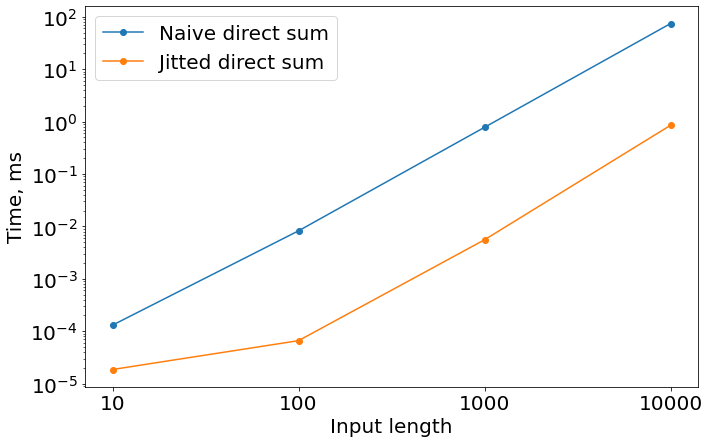

In [35]:
plt.plot(range(1, 5), time_d_sum, '-o', label='Naive direct sum')
plt.plot(range(1, 5), time_jitted_d_sum, '-o', label='Jitted direct sum')

plt.xticks(range(1, 5), sizes)
plt.xlabel('Input length')
plt.ylabel('Time, ms')
plt.legend()
plt.yscale('log');